In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json 
import ast
from helpers import visualizing_data
import networkx as nx
from helpers_continent import adding_continents
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
dataframe = pd.read_csv('Data/movie.metadata.genres.tsv', sep='\t')



In [8]:
dataframe

,Unnamed: 0,Wikipedia movieID,Freebase movieID,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie release year,Movie release month,Movie release season,genre 1,genre 2
0,0,13388989,/m/03c3qdq,Pirate Gold,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}",1913,1,1,NaN,NaN
1,1,15839614,/m/03nwzrh,Hinemoa,NaN,24.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...",1913,3,2,Drama,NaN
2,2,14071789,/m/03cspdc,The Twelfth Juror,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}",1913,4,2,Drama,NaN
3,3,7709364,/m/0kvflk,In the Mountains of Virginia,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}",1913,10,4,NaN,NaN
4,4,13389288,/m/03c3qzt,Brothers,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}",1913,2,1,Drama,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41850,41850,36465188,/m/0h2h9tt,El Gringo,NaN,NaN,{},"{""/m/09c7w0"": ""United States of America""}",2012,5,2,Action,NaN
41851,41851,35320614,/m/0j7jmy8,Live at the Machine Shop,NaN,67.0,"{""/m/02h40lc"": ""English Language""}",{},2012,3,2,NaN,NaN
41852,41852,34961787,/m/0j438k5,Romeo,NaN,NaN,"{""/m/09bnf"": ""Kannada Language""}","{""/m/03rk0"": ""India""}",2012,7,3,Romance,NaN
41853,41853,34881832,/m/0j45hrp,Putta,NaN,NaN,"{""/m/09bnf"": ""Kannada Language""}","{""/m/03rk0"": ""India""}",2012,10,4,NaN,NaN


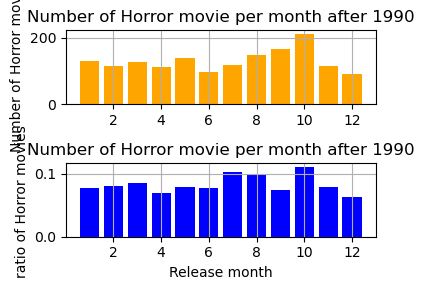

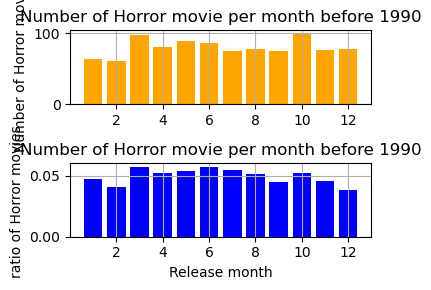

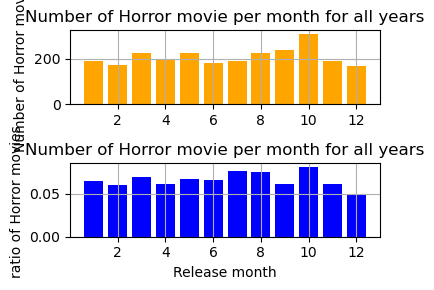

In [9]:
visualizing_data(dataframe, 1990, 'Horror') #input : df, split year, genre

In [49]:
dataframe2 = adding_continents(dataframe)


We don't classify countries with less than 5 movies which represents 103 movies
 Only 2895 movies have 2 continents so we take only continent 1 into consideration 
northa -> 1
Europe -> 2
southa -> 3
 Asia -> 4
 Africa -> 5


In [48]:
dataframe2.head()

,Unnamed: 0,Wikipedia movieID,Freebase movieID,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie release year,Movie release month,Movie release season,genre 1,genre 2,continent_1
0,0,13388989,/m/03c3qdq,Pirate Gold,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}",1913,1,1,NaN,NaN,1.0
1,1,15839614,/m/03nwzrh,Hinemoa,NaN,24.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...",1913,3,2,Drama,NaN,1.0
2,2,14071789,/m/03cspdc,The Twelfth Juror,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}",1913,4,2,Drama,NaN,1.0
3,3,7709364,/m/0kvflk,In the Mountains of Virginia,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}",1913,10,4,NaN,NaN,1.0
4,4,13389288,/m/03c3qzt,Brothers,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}",1913,2,1,Drama,NaN,1.0


Preparing dataframe for analysis. Asign 1 for Horror movies and 0 for other genres. Keeping the features we want

In [47]:
df_analysis = dataframe2.copy(deep=True)
df_analysis=df_analysis[~(df_analysis['continent_1'].isna())] #removing NaN continent

df_analysis['horror'] = (df_analysis['genre 1']=='Horror' )| (df_analysis['genre 2']=='Horror' )
df_analysis['horror'] = df_analysis['horror'].replace([True, False], [1, 0])
df_analysis=df_analysis[['horror','Movie release year', 'Movie release month', 'continent_1']]


df_analysis.rename(columns={"Movie release year": "Movie_release_year"}, inplace=True) #renaming because spaces are not convenient for causal analysis
df_analysis.rename(columns={"Movie release month": "Movie_release_month"}, inplace=True)

df_analysis.head()

,horror,Movie_release_year,Movie_release_month,continent_1
0,0,1913,1,1.0
1,0,1913,3,1.0
2,0,1913,4,1.0
3,0,1913,10,1.0
4,0,1913,2,1.0


Obtaining the propensity scores :

In [12]:
import statsmodels.formula.api as smf
# let's standardize the continuous features
df_analysis['Movie_release_year'] = (df_analysis['Movie_release_year'] - df_analysis['Movie_release_year'].mean())/df_analysis['Movie_release_year'].std()
df_analysis['continent_1'] = (df_analysis['continent_1'] - df_analysis['continent_1'].mean())/df_analysis['continent_1'].std()


mod = smf.logit(formula='horror ~  Movie_release_year + continent_1', data=df_analysis)

res = mod.fit()

# Extract the estimated propensity scores
df_analysis['Propensity_score'] = res.predict()

print(res.summary())

Optimization terminated successfully.
         Current function value: 0.284801
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 horror   No. Observations:                17592
Model:                          Logit   Df Residuals:                    17589
Method:                           MLE   Df Model:                            2
Date:                Thu, 16 Nov 2023   Pseudo R-squ.:                 0.01085
Time:                        11:49:28   Log-Likelihood:                -5010.2
converged:                       True   LL-Null:                       -5065.2
Covariance Type:            nonrobust   LLR p-value:                 1.347e-24
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.4279      0.028    -86.235      0.000      -2.483      -2.373
Movie

Then, we match the data, one treated with one control.
We first extract a random sample of the data for the analysis not to last too long but at the end we can take the whole data for accuracy

In [13]:
df_analysis_sample = df_analysis.sample(frac=0.1, random_state=1)# take 1/10 of the data


In [14]:
def get_similarity(propensity_score1, propensity_score2):
    '''Calculate similarity for instances with given propensity scores'''
    return 1-np.abs(propensity_score1-propensity_score2)

In [15]:
# Separate the treatment and control groups
treatment_df = df_analysis_sample[df_analysis_sample['horror'] == 1]
control_df = df_analysis_sample[df_analysis_sample['horror'] == 0]

# Create an empty undirected graph
G = nx.Graph()

# Loop through all the pairs of instances
for control_id, control_row in control_df.iterrows():
    for treatment_id, treatment_row in treatment_df.iterrows():

        # Calculate the similarity 
        similarity = get_similarity(control_row['Propensity_score'],
                                    treatment_row['Propensity_score'])

        # Add an edge between the two instances weighted by the similarity between them
        G.add_weighted_edges_from([(control_id, treatment_id, similarity)])

# Generate and return the maximum weight matching on the generated graph
matching = nx.max_weight_matching(G)

In [16]:
matched = [i[0] for i in list(matching)] + [i[1] for i in list(matching)]
balanced_df_1 = df_analysis.loc[matched]
balanced_df_1

,horror,Movie_release_year,Movie_release_month,continent_1,Propensity_score
10513,0,0.421349,8,1.608538,0.059554
16250,0,1.085228,11,-0.772129,0.117071
298,0,-2.234167,11,-0.772129,0.065342
18300,0,1.417168,10,-0.772129,0.123851
12571,0,0.753289,3,1.608538,0.063242
...,...,...,...,...,...
10051,1,0.421349,10,-0.772129,0.104473
14858,1,0.919258,2,-0.772129,0.113803
11706,1,0.587319,3,1.608538,0.061372
3388,1,-1.072378,10,-0.772129,0.080430


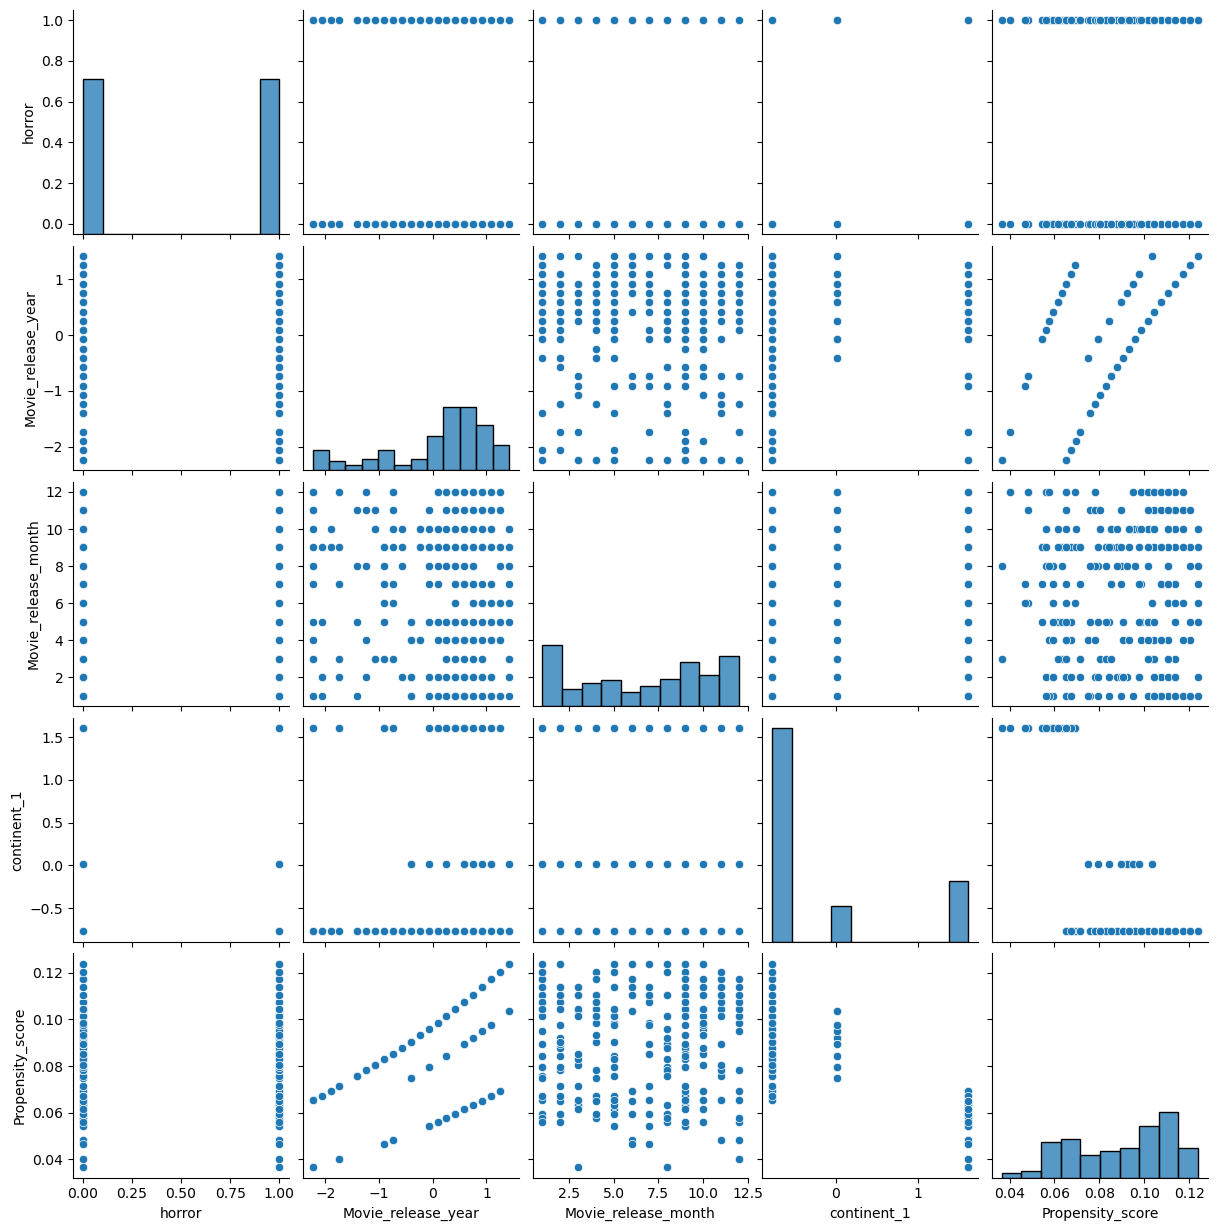

In [17]:
import seaborn as sns
sns.pairplot(balanced_df_1)

In [18]:
balanced_df_1.groupby('Movie_release_month').count()

,horror,Movie_release_year,continent_1,Propensity_score
Movie_release_month,,,,
1,28,28,28,28
2,26,26,26,26
3,15,15,15,15
4,20,20,20,20
5,23,23,23,23
6,12,12,12,12
7,18,18,18,18
8,24,24,24,24
9,39,39,39,39
